# Assignment 3 - Hypothesis Testing

### Q1. A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from scipy import stats
from scipy.stats import norm

##### Assuming Null hyposthesis as Ho: uA = uB (There is no difference in diameters of cutlets between two units).

##### Alternate hypothesis as Ha: uA is not equal uB (There is significant difference in diameters of cutlets between two units) 2 Sample 2 Tail test applicable

In [2]:
data=pd.read_csv('Cutlets.csv')
data.head()


,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
data.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [4]:
data.shape

(35, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [6]:
data.describe(include='all')

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [7]:
unitA=pd.Series(data.iloc[:,0])
unitA

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [8]:
unitB=pd.Series(data.iloc[:,1])
unitB

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

In [9]:
# Performing 2-tail ttest with indepedent sample (stats.ttest_ind(array1,array2) refers to independent data/array)    

p_value=stats.ttest_ind(unitA,unitB)
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

##### If we compare p_value with α = 0.05 (At 5% significance level) then we failed to reject Null Hypothesis

<Axes: ylabel='Density'>

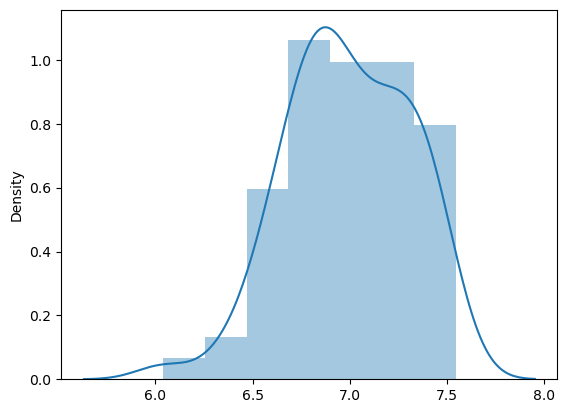

In [10]:
import warnings
warnings.filterwarnings('ignore')

snb.distplot(data)

# Q2.    A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.

# Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


##### Assuming Null Hypothesis Ho as No Variance: All samples TAT population means are same

##### Alternate Hypothesis Ha as It has Variance: Atleast one sample TAT population mean is different

In [11]:
hosp_data = pd.read_csv('LabTAT.csv')
hosp_data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [12]:
hosp_data.shape

(120, 4)

In [13]:
hosp_data.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [14]:
hosp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [15]:
hosp_data.describe(include='all')

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [16]:
# Performing Anova ftest statistics with stats.f_oneway(column-1,column-2,column-3,column-4)

p_value=stats.f_oneway(hosp_data['Laboratory 1'],hosp_data['Laboratory 2'],hosp_data['Laboratory 3'],hosp_data['Laboratory 4'])
p_value

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [17]:
# or we can performn in this way

# p_value=stats.f_oneway(hosp_data.iloc[:,0],hosp_data.iloc[:,1],hosp_data.iloc[:,2],hosp_data.iloc[:,3])
# p_value

##### If we compare p_value with α = 0.05 (At 5% significance level) then we Reject Null Hypothesis

<Axes: ylabel='Density'>

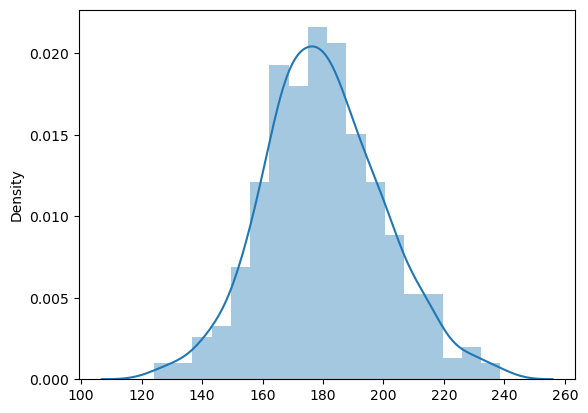

In [18]:
snb.distplot(hosp_data)

# Q3. Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.


In [19]:
from scipy.stats import chi2_contingency

##### Assuming Null Hypothesis as Ho: Independence of categorical variables (male-female buyer rations are similar across regions does not vary and are not related)

##### Alternate Hypothesis as Ha: Dependence of categorical variables (male-female buyer rations are not similar across regions does vary and somewhat related)

In [20]:
sales_data = pd.read_csv('BuyerRatio.csv')
sales_data

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [21]:
# Converting the datapoints into numpy array

arr = np.array([[50,142,131,70], [435,1523,1356,750]])
arr

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

In [22]:
# Performing Chi2 Contingency Independent Test

chi2_contingency(arr) # We will get statistic, p_value, degree_of_freedom, expected_values_of_array

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

##### If we compare p_value with α = 0.05 (At 5% significance level) then we Failed to Reject Null Hypothesis

# Q4. TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


##### Assuming Null Hypothesis as Ho: Independence of categorical variables (customer order forms defective % does not varies by centre)

##### Alternative hypothesis as Ha Dependence of categorical variables (customer order forms defective % varies by centre)

In [23]:
call_data = pd.read_csv('Costomer+OrderForm.csv')
call_data.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [24]:
call_data.shape

(300, 4)

In [25]:
call_data.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [26]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [27]:
call_data.describe(include='all')

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [28]:
call_data.value_counts()

Phillippines  Indonesia   Malta       India     
Error Free    Error Free  Error Free  Error Free    206
Defective     Error Free  Error Free  Error Free     21
Error Free    Defective   Error Free  Error Free     20
              Error Free  Defective   Error Free     18
                          Error Free  Defective      16
              Defective   Defective   Error Free      9
Defective     Error Free  Defective   Error Free      4
              Defective   Error Free  Error Free      2
              Error Free  Error Free  Defective       2
Error Free    Defective   Error Free  Defective       2
dtype: int64

In [29]:
call_data.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [30]:
call_data.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [31]:
call_data.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [32]:
call_data.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [33]:
# Creating a array/table of Error Free w.r.t. (with respect to) Defective of all Countries/Columns

observed_val = np.array([[271,267,269,280], [29,33,31,20]])
observed_val

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [34]:
# Chi2 Contingency Independent Test

chi2_contingency(observed_val) # We will get statistic, p_value, degree_of_freedom, expected_values_of_array

Chi2ContingencyResult(statistic=3.858960685820355, pvalue=0.2771020991233135, dof=3, expected_freq=array([[271.75, 271.75, 271.75, 271.75],
       [ 28.25,  28.25,  28.25,  28.25]]))

##### If we compare p_value with α = 0.05 (At 5% significance level) then we Failed to Reject Null Hypothesis